In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load the vehicles.csv file

'''
Load this csv available from the following website:

https://www.fueleconomy.gov/feg/epadata/vehicles.csv
'''
vehicles_df = pd.read_csv('/storage/work/amd7293/NREL/tempo/data/vehicles.csv', low_memory=False)

# Check the first few rows of the dataframe to understand its structure
vehicles_df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
# Filter the dataframe based on the 'fuelType' column (We will cobine it later)
ev_df = vehicles_df[vehicles_df['fuelType'] == "Electricity"]
phev_df = vehicles_df[vehicles_df['fuelType'].str.contains("Electricity") & (vehicles_df['fuelType'] != "Electricity")]

# Display the first few rows of each dataframe to verify
#ev_df.head(), phev_df.head()


In [4]:
# Attempt to load the Excel file with adjustments for merged cells and skipped rows/columns

'''
Look for the dataset here:

https://afdc.energy.gov/data/10567
'''

try:
    # Skipping the first row and first column
    pev_sales_data_adjusted = pd.read_excel('/storage/work/amd7293/NREL/tempo/data/PEV_sales.xlsx', sheet_name=0, skiprows=1, usecols=range(1, 12))
except Exception as e:
    # If there is an error, print the error message
    error_message_adjusted = str(e)

# Check if the data is loaded or if there was an error
if 'pev_sales_data_adjusted' in locals():
    loaded_adjusted = True
    pev_sales_data_adjusted_head = pev_sales_data_adjusted.head()
else:
    loaded_adjusted = False
    pev_sales_data_adjusted_head = None

loaded_adjusted, pev_sales_data_adjusted_head, error_message_adjusted if not loaded_adjusted else ''

# Set the first row as the header
pev_sales_data_adjusted.columns = pev_sales_data_adjusted.iloc[0]
pev_sales_data_adjusted = pev_sales_data_adjusted[1:]
# Find the index where "Vehicle" is equal to "Total"
total_index = pev_sales_data_adjusted[pev_sales_data_adjusted['Vehicle'] == 'Total'].index - 1

# If there are rows with "Total", delete them and all rows after
if not total_index.empty:
    last_total_index = total_index.max()
    pev_sales_data_adjusted = pev_sales_data_adjusted.iloc[:last_total_index]
    
# Replace "Chevy" with "Chevrolet" and "VW" with "Volkswagen" in the "Vehicle" column and some more minor adjustments
pev_sales_data_adjusted['Vehicle'] = pev_sales_data_adjusted['Vehicle'].str.replace(r'\bChevy\b', 'Chevrolet', regex=True)
pev_sales_data_adjusted['Vehicle'] = pev_sales_data_adjusted['Vehicle'].str.replace(r'\bVW\b', 'Volkswagen', regex=True)
pev_sales_data_adjusted['Vehicle'] = pev_sales_data_adjusted['Vehicle'].str.replace('-', ' ')
pev_sales_data_adjusted['Vehicle'] = pev_sales_data_adjusted['Vehicle'].str.replace('Prius', 'Toyota Prius')


#pev_sales_data_adjusted

In [5]:
# Load the MSRP data ( Will generate from msrp notebook)
msrp_df = pd.read_csv('/storage/work/amd7293/NREL/tempo/output/msrp.csv')
msrp_df

,Model Year,Car Name,MSRP,Vehicle Class,Total Range,First Five Words
0,2011,Chevrolet Volt,41000.0,PHEV,35,Chevrolet Volt
1,2011,Nissan Leaf,32780.0,EV,73,Nissan Leaf
2,2012,Chevrolet Volt,39145.0,PHEV,35,Chevrolet Volt
3,2012,Fisker Karma,115000.0,PHEV,33,Fisker Karma
4,2012,Ford Focus Electric,39200.0,EV,76,Ford Focus Electric
...,...,...,...,...,...,...
662,2024,Porsche Taycan GTS Sport Turismo,141200.0,EV,233,Porsche Taycan GTS Sport Turismo
663,2024,Porsche Taycan Performance Battery,90900.0,EV,208,Porsche Taycan Performance Battery
664,2024,Porsche Taycan Turbo S,194900.0,EV,222,Porsche Taycan Turbo S
665,2024,Porsche Taycan Turbo S Cross Turismo,197500.0,EV,222,Porsche Taycan Turbo S Cross


In [6]:
## Matching the car names (I will clean this part)

from fuzzywuzzy import fuzz
import re

def preprocess_model(model):
    # Remove special characters and split into components
    components = re.sub(r'[^A-Za-z0-9 ]+', '', model).split()
    # Sort components alphabetically
    return sorted(components)

def match_score(make1, model1, vehicle_name):
    # Split vehicle name into make and model components
    vehicle_components = vehicle_name.split(' ', 1)
    vehicle_make = vehicle_components[0]
    vehicle_model = vehicle_components[1] if len(vehicle_components) > 1 else ''

    # Check make match score
    make_score = fuzz.ratio(make1, vehicle_make)
    
    if make_score >= 80:  # If makes match with high confidence
        model1_components = preprocess_model(model1)
        vehicle_model_components = preprocess_model(vehicle_model)

        # Check model match score
        model_match_count = sum([1 for word in model1_components if word in vehicle_model_components])
        model_score = (model_match_count / len(model1_components)) * 100 if model1_components else 0

        # Combine make and model scores
        return model_score
    else:
        return 0

def get_best_match_sales(make, model, vehicle_type, choices, score_cutoff=1):
    filtered_choices = choices[choices['Type'] == vehicle_type]['Vehicle'].unique()
    best_match, best_score = None, 0

    for choice in filtered_choices:
        score = match_score(make, model, choice)
        if score > best_score and score >= score_cutoff:
            best_match, best_score = choice, score

    return best_match

def get_best_match_msrp(make, model, vehicle_type, choices, score_cutoff=1):
    filtered_choices = choices[choices['Vehicle Class'] == vehicle_type]['Car Name'].unique()
    best_match, best_score = None, 0

    for choice in filtered_choices:
        score = match_score(make, model, choice)
        if score > best_score and score >= score_cutoff:
            best_match, best_score = choice, score

    return best_match

# Function to retrieve sales data for a matched vehicle and year
def get_sales_data(row, sales_data):
    matched_vehicle = row['Best Match Sales']
    year = float(row['year'])  # Convert year to string for column matching
    if matched_vehicle and year in sales_data.columns:
        # Get the sales data for the matched vehicle and year
        matched_row = sales_data[sales_data['Vehicle'] == matched_vehicle]
        if not matched_row.empty:
            return matched_row.iloc[0][year]
    return "NA"

def get_msrp_data(row, msrp_data):
    matched_vehicle = row['Best Match MSRP']
    year = row['year']  # Assuming year is already in the correct format

    # Find a row in msrp_data where 'Car Name' matches 'Best Match MSRP' and 'Model Year' matches 'year'
    matched_row = msrp_data[(msrp_data['Car Name'] == matched_vehicle) & (msrp_data['Model Year'] == year)]

    # If a matching row is found, return the MSRP value; otherwise, return "NA"
    return matched_row['MSRP'].iloc[0] if not matched_row.empty else "NA"


# Apply the get_best_match_sales function to each row in ev_df and phev_df
ev_df['Best Match Sales'] = ev_df.apply(lambda row: get_best_match_sales(row['make'], row['model'], vehicle_type='EV', choices=pev_sales_data_adjusted), axis=1)
phev_df['Best Match Sales'] = phev_df.apply(lambda row: get_best_match_sales(row['make'], row['model'], vehicle_type='PHEV', choices=pev_sales_data_adjusted), axis=1)

# Apply the get_best_match_msrp function to each row in ev_df and phev_df
ev_df['Best Match MSRP'] = ev_df.apply(lambda row: get_best_match_msrp(row['make'], row['model'], vehicle_type='EV', choices=msrp_df), axis=1)
phev_df['Best Match MSRP'] = phev_df.apply(lambda row: get_best_match_msrp(row['make'], row['model'], vehicle_type='PHEV', choices=msrp_df), axis=1)


# Apply the get_sales_data function to each row in ev_df and phev_df
ev_df['Total Sales'] = ev_df.apply(lambda row: get_sales_data(row, pev_sales_data_adjusted), axis=1)
phev_df['Total Sales'] = phev_df.apply(lambda row: get_sales_data(row, pev_sales_data_adjusted), axis=1)

# Apply the get_msrp_data function to each row in ev_df and phev_df
ev_df['MSRP'] = ev_df.apply(lambda row: get_msrp_data(row, msrp_df), axis=1)
phev_df['MSRP'] = phev_df.apply(lambda row: get_msrp_data(row, msrp_df), axis=1)


# Displaying the first few rows of each dataframe to verify the matches and sales data
#ev_df.head(), phev_df.head()


/storage/home/amd7293/.conda/envs/tf/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
/tmp/ipykernel_3278009/3696376572.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df['Best Match Sales'] = ev_df.apply(lambda row: get_best_match_sales(row['make'], row['model'], vehicle_type='EV', choices=pev_sales_data_adjusted), axis=1)
/tmp/ipykernel_3278009/3696376572.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [7]:
# For ev_df
#ev_df = ev_df[(ev_df['year'] >= 2010) & (ev_df['year'] <= 2020)]

# For phev_df
#phev_df = phev_df[(phev_df['year'] >= 2010) & (phev_df['year'] <= 2020)]

In [8]:
ev_df[['make', 'year','model','Best Match MSRP', 'Best Match Sales', 'MSRP', 'Total Sales']]

,make,year,model,Best Match MSRP,Best Match Sales,MSRP,Total Sales
7138,Nissan,2000,Altra EV,None,None,NA,NA
7139,Toyota,2000,RAV4 EV,Toyota RAV4 EV,Toyota RAV4 EV,NA,NA
8143,Toyota,2001,RAV4 EV,Toyota RAV4 EV,Toyota RAV4 EV,NA,NA
8144,Ford,2001,Th!nk,None,None,NA,NA
8146,Ford,2001,Explorer USPS Electric,Ford Focus Electric,None,NA,NA
...,...,...,...,...,...,...,...
41204,Volkswagen,2024,ID.4 Pro,Volkswagen ID.4 AWD Pro,None,NA,NA
41205,Volkswagen,2024,ID.4 AWD Pro,Volkswagen ID.4 AWD Pro,None,NA,NA
41206,Volkswagen,2024,ID.4 AWD Pro S,Volkswagen ID.4 AWD Pro S,None,NA,NA
41207,Vinfast,2024,VF 9 Eco,Vinfast VF 8 Eco,None,NA,NA


In [9]:
phev_df[['make', 'year','model','Best Match MSRP', 'Best Match Sales', 'MSRP', 'Total Sales']]

,make,year,model,Best Match MSRP,Best Match Sales,MSRP,Total Sales
23033,Chevrolet,2011,Volt,Chevrolet Volt,Chevrolet Volt,41000.0,7671.0
23735,Chevrolet,2012,Volt,Chevrolet Volt,Chevrolet Volt,39145.0,23461.0
24686,Toyota,2012,Prius Plug-in Hybrid,Toyota Prius Plug-in Hybrid,Toyota Prius PHEV,39525.0,12749.0
24722,Fisker,2012,Karma,Fisker Karma,None,115000.0,NA
24875,Chevrolet,2013,Volt,Chevrolet Volt,Chevrolet Volt,39145.0,23094.0
...,...,...,...,...,...,...,...
41224,Toyota,2024,Prius Prime SE,Toyota Prius Prime SE,Toyota Prius PHEV,NA,NA
41225,Toyota,2024,RAV4 Prime 4WD,Toyota RAV4 Prime 4WD,None,47310.0,NA
41226,Volvo,2024,S60 T8 AWD Recharge,Volvo S60 T8 AWD Recharge,None,NA,NA
41227,Volvo,2024,XC60 T8 AWD Recharge,Volvo XC60 T8 AWD Recharge,Volvo XC60 Plug In,NA,NA


In [10]:
phev_df.VClass.unique()

array(['Compact Cars', 'Midsize Cars', 'Subcompact Cars', 'Large Cars',
       'Two Seaters', 'Standard Sport Utility Vehicle 4WD',
       'Minivan - 2WD', 'Small Sport Utility Vehicle 4WD',
       'Small Station Wagons', 'Small Sport Utility Vehicle 2WD',
       'Minicompact Cars'], dtype=object)

In [11]:
ev_df.VClass.unique()

array(['Midsize Station Wagons', 'Sport Utility Vehicle - 2WD',
       'Two Seaters', 'Standard Pickup Trucks 2WD', 'Compact Cars',
       'Minivan - 2WD', 'Small Pickup Trucks 2WD', 'Minicompact Cars',
       'Midsize Cars', 'Subcompact Cars', 'Special Purpose Vehicle 2WD',
       'Large Cars', 'Small Station Wagons',
       'Small Sport Utility Vehicle 2WD',
       'Standard Sport Utility Vehicle 4WD',
       'Small Sport Utility Vehicle 4WD', 'Standard Pickup Trucks 4WD',
       'Standard Sport Utility Vehicle 2WD',
       'Special Purpose Vehicle 4WD'], dtype=object)

In [12]:
# Vehicle Category Transformations to match ANL data
category_mapping = {
    "Compact Cars": "Compact",
    "Midsize Cars": "Midsize",
    "Subcompact Cars": "Midsize",
    "Large Cars": "SUV",
    "Two Seaters": "Midsize",
    "Sport Utility Vehicle - 2WD": "SUV",
    "Standard Sport Utility Vehicle 4WD": "SUV",
    "Minivan - 2WD": "Pickup",
    "Small Sport Utility Vehicle 4WD": "SUV",
    "Small Station Wagons": "SUV",
    "Small Sport Utility Vehicle 2WD": "SUV",
    "Minicompact Cars": "Compact"
}

phev_df['class'] = phev_df['VClass'].map(category_mapping)
ev_df['class'] = ev_df['VClass'].map(category_mapping)

/tmp/ipykernel_3278009/520754301.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phev_df['class'] = phev_df['VClass'].map(category_mapping)
/tmp/ipykernel_3278009/520754301.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df['class'] = ev_df['VClass'].map(category_mapping)


In [13]:
def categorize_phev(row):
    if np.float(row.rangeA) <= 25:
        return "PHEV_25"
    elif np.float(row.rangeA) <= 50:
        return "PHEV_50"
    else:
        return "PHEV_75"  # or handle other cases as needed

phev_df['Tech'] = phev_df.apply(categorize_phev, axis=1)
def categorize_bev(row):
    if row.range <= 200:
        return "BEV_200"
    elif row.range <= 300:
        return "BEV_300"
    elif row.range > 300:
        return "BEV_400"
    else:
        return "Other"  # or handle other cases as needed

ev_df['Tech'] = ev_df.apply(categorize_bev, axis=1)


## add 100

/tmp/ipykernel_3278009/3321555773.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.float(row.rangeA) <= 25:
/tmp/ipykernel_3278009/3321555773.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif np.float(row.rangeA) <= 50:
/tmp/ipykernel_3278009/3321555773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [14]:
ev_df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,startStop,phevCity,phevHwy,phevComb,Best Match Sales,Best Match MSRP,Total Sales,MSRP,class,Tech
7138,0.0960,0.0,0.0,0.0,81,0.000,0,0.0,0.0,41.0000,...,N,0,0,0,None,None,NA,NA,NaN,BEV_200
7139,0.1128,0.0,0.0,0.0,81,0.000,0,0.0,0.0,41.0000,...,N,0,0,0,Toyota RAV4 EV,Toyota RAV4 EV,NA,NA,SUV,BEV_200
8143,0.1128,0.0,0.0,0.0,81,0.000,0,0.0,0.0,41.0000,...,N,0,0,0,Toyota RAV4 EV,Toyota RAV4 EV,NA,NA,SUV,BEV_200
8144,0.1248,0.0,0.0,0.0,74,0.000,0,0.0,0.0,46.0000,...,N,0,0,0,None,None,NA,NA,Midsize,BEV_200
8146,0.2088,0.0,0.0,0.0,45,0.000,0,0.0,0.0,75.0000,...,N,0,0,0,None,Ford Focus Electric,NA,NA,SUV,BEV_200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41204,0.0720,0.0,0.0,8.0,122,122.500,0,0.0,0.0,27.5143,...,N,0,0,0,None,Volkswagen ID.4 AWD Pro,NA,NA,SUV,BEV_300
41205,0.0792,0.0,0.0,8.0,108,108.220,0,0.0,0.0,31.1449,...,N,0,0,0,None,Volkswagen ID.4 AWD Pro,NA,NA,SUV,BEV_300
41206,0.0792,0.0,0.0,8.0,108,108.220,0,0.0,0.0,31.1449,...,N,0,0,0,None,Volkswagen ID.4 AWD Pro S,NA,NA,SUV,BEV_300
41207,0.1080,0.0,0.0,15.0,79,78.765,0,0.0,0.0,42.7918,...,N,0,0,0,None,Vinfast VF 8 Eco,NA,NA,NaN,BEV_400


In [15]:
'''
ev_df = ev_df.dropna(subset=['Best Match Sales'])
phev_df = phev_df.dropna(subset=['Best Match Sales'])
ev_df = ev_df.dropna(subset=['Best Match MSRP'])
phev_df = phev_df.dropna(subset=['Best Match MSRP'])
'''

"\nev_df = ev_df.dropna(subset=['Best Match Sales'])\nphev_df = phev_df.dropna(subset=['Best Match Sales'])\nev_df = ev_df.dropna(subset=['Best Match MSRP'])\nphev_df = phev_df.dropna(subset=['Best Match MSRP'])\n"

In [16]:
ev_df['fe_comb'] = ev_df['combE']*10 # from kwhr/100miles to watt-hr/mile
phev_df['fe_comb'] = 1000*33.7/phev_df['phevComb']

/tmp/ipykernel_3278009/4171635275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df['fe_comb'] = ev_df['combE']*10 # from kwhr/100miles to watt-hr/mile
/tmp/ipykernel_3278009/4171635275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phev_df['fe_comb'] = 1000*33.7/phev_df['phevComb']


In [17]:
# Load FOTW_1272_web.csv for dollar_per_kwh data
fotw_1272_path = "/storage/work/amd7293/NREL/tempo/data/FOTW_1272_web.csv"
fotw_1272_df = pd.read_csv(fotw_1272_path, index_col=False)
fotw_1272_df['year']

0     2008
1     2009
2     2010
3     2011
4     2012
5     2013
6     2014
7     2015
8     2016
9     2017
10    2018
11    2019
12    2020
13    2021
14    2022
Name: year, dtype: int64

In [18]:
# Revised function to retrieve dollar_per_kwh for the given year
def get_dollar_per_kwh(year, dollar_per_kwh_df):
    matched_row = dollar_per_kwh_df[dollar_per_kwh_df['year'] == year]
    return matched_row['Current Dollars'].iloc[0] if not matched_row.empty else 0  # Return 0 if no match found

# Calculate battery cost while handling NaN values and ensuring no NoneType errors
ev_df['battery_cost'] = ev_df.apply(
    lambda row: ((row['range'] * row['fe_comb'])/1000) * get_dollar_per_kwh(row['year'], fotw_1272_df)
    if pd.notna(row['range']) and pd.notna(row['fe_comb']) else np.nan, 
    axis=1
)


/tmp/ipykernel_3278009/2174153021.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_df['battery_cost'] = ev_df.apply(


In [19]:
# Display the updated DataFrame
ev_df[['range','fe_comb','year','battery_cost', 'MSRP']]

,range,fe_comb,year,battery_cost,MSRP
7138,90,400.000,2000,0.0,NA
7139,88,470.000,2000,0.0,NA
8143,88,470.000,2001,0.0,NA
8144,29,520.000,2001,0.0,NA
8146,38,870.000,2001,0.0,NA
...,...,...,...,...,...
41204,291,297.830,2024,0.0,NA
41205,263,329.685,2024,0.0,NA
41206,263,329.685,2024,0.0,NA
41207,330,448.914,2024,0.0,NA


/tmp/ipykernel_3278009/2855976179.py:8: FutureWarning: ['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany', 'VClass', 'baseModel', 'atvType', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn', 'startStop', 'Best Match Sales', 'Best Match MSRP', 'Total Sales', 'MSRP'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped_df = filtered_df.groupby(['year', 'Tech', 'class']).agg(['mean', 'std'])['battery_cost'].reset_index()


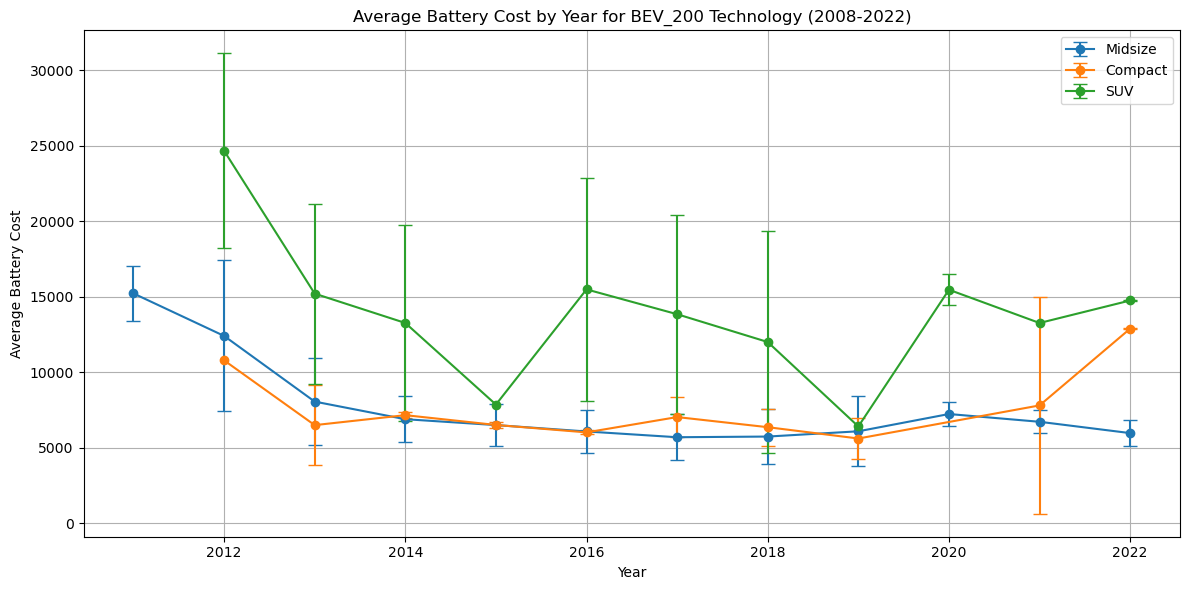

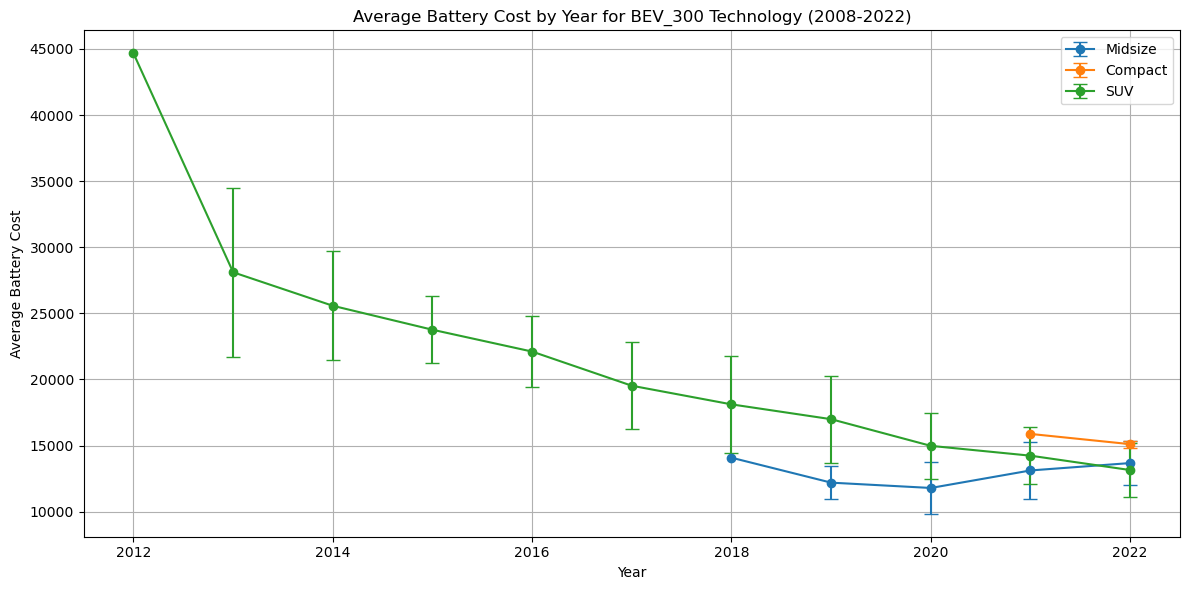

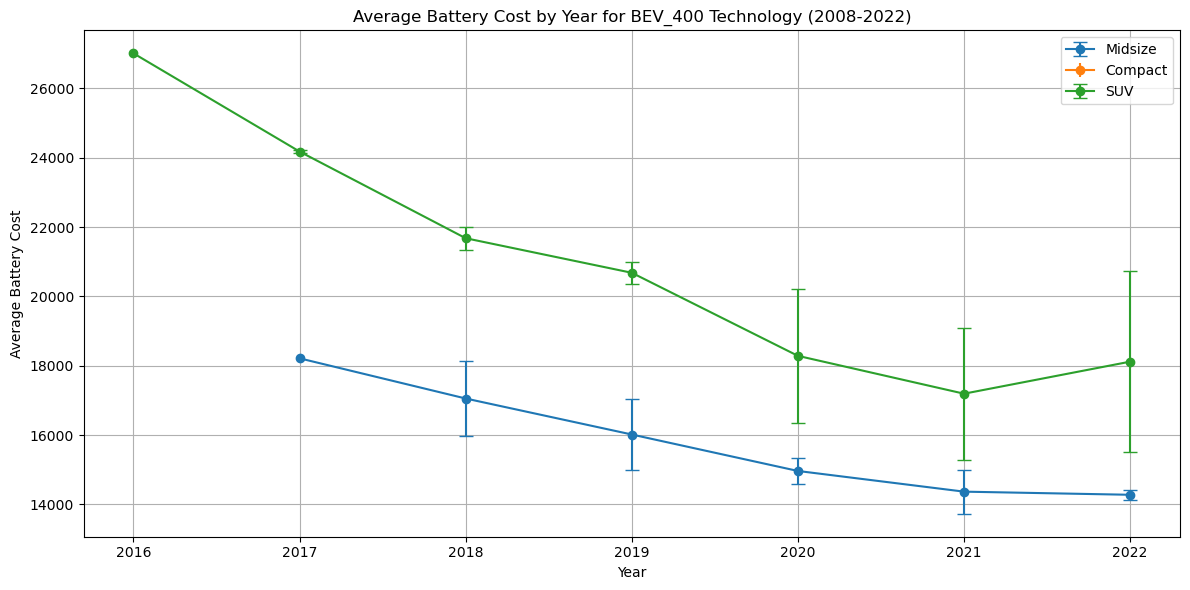

In [20]:
import matplotlib.pyplot as plt

# Replace with your actual DataFrame
battery_cost_df = ev_df

# Filter and Group Data
filtered_df = battery_cost_df[(battery_cost_df['year'] >= 2010) & (battery_cost_df['year'] <= 2022)]
grouped_df = filtered_df.groupby(['year', 'Tech', 'class']).agg(['mean', 'std'])['battery_cost'].reset_index()

# Plotting for Each Tech Category
tech_categories = grouped_df['Tech'].unique()
for tech in tech_categories:
    plt.figure(figsize=(12, 6))
    for vehicle_class in grouped_df['class'].unique():
        class_tech_df = grouped_df[(grouped_df['Tech'] == tech) & (grouped_df['class'] == vehicle_class)]
        plt.errorbar(class_tech_df['year'], class_tech_df['mean'], yerr=class_tech_df['std'], fmt='o-', label=f'{vehicle_class}', capsize=5)
    plt.title(f'Average Battery Cost by Year for {tech} Technology (2008-2022)')
    plt.xlabel('Year')
    plt.ylabel('Average Battery Cost')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [29]:
import pandas as pd
import numpy as np

# Define the ranges and categories
years = range(2012, 2023)
techs = ['BEV_200', 'BEV_300', 'BEV_400']
classes = ['SUV', 'Midsize', 'Compact']

# Create a DataFrame with all combinations
grouped_df_imputed = pd.DataFrame([(year, tech, cls) for year in years for tech in techs for cls in classes], columns=['year', 'Tech', 'class'])

# Assuming grouped_df is already defined and has 'year', 'Tech', 'class', 'battery_cost' columns

# Merge to bring in 'battery_cost' from grouped_df, using left join to keep all rows from grouped_df_imputed
grouped_df_imputed = pd.merge(grouped_df_imputed, grouped_df[['year', 'Tech', 'class', 'mean', 'std']], how='left', on=['year', 'Tech', 'class'])

# Fill missing 'battery_cost' with 0
grouped_df_imputed['mean'] = grouped_df_imputed['mean'].fillna(0)
grouped_df_imputed['std'] = grouped_df_imputed['std'].fillna(0)

# Rename 'mean' column to 'battery_cost' in grouped_df
grouped_df_imputed = grouped_df_imputed.rename(columns={'mean': 'battery_cost'})

# Display the first few rows of the new DataFrame
print(grouped_df_imputed.head())


   year     Tech    class  battery_cost          std
0  2012  BEV_200      SUV  24664.160000  6449.108001
1  2012  BEV_200  Midsize  12406.013333  5001.277372
2  2012  BEV_200  Compact  10788.352000     0.000000
3  2012  BEV_300      SUV  44670.520000     0.000000
4  2012  BEV_300  Midsize      0.000000     0.000000


In [31]:
# Initialize 'imputed' column in ev_df
grouped_df_imputed['imputed'] = 0

def impute_battery_cost(row, mean, std, multiplier=1):
    # Draw samples and calculate new cost
    samples = np.random.normal(mean, std, 20)
    new_cost = np.mean(samples) * multiplier
    return new_cost

# Iterate over each "Tech" and "class" combination
tech_options = ['BEV_200', 'BEV_300', 'BEV_400']
class_options =['SUV', 'Midsize', 'Compact']

for tech in tech_options:
    for vehicle_class in class_options:
        # Apply imputation for each combination
        condition = (grouped_df_imputed['year'].between(2012, 2022)) & (grouped_df_imputed['Tech'] == tech) & (grouped_df_imputed['class'] == vehicle_class)
        for index, row in grouped_df_imputed[condition].iterrows():
            if row['battery_cost'] == 0:
                # Fetch mean and std from grouped_df
                mean_std = grouped_df[(grouped_df['Tech'] == 'BEV_200') & 
                                      (grouped_df['year'] == row['year']) & 
                                      (grouped_df['class'] == vehicle_class)]
                
                if not mean_std.empty:
                    mean = mean_std.iloc[0]['mean']
                    std = mean_std.iloc[0]['std']
                    
                    # Check if std is NaN and handle it
                    if pd.isna(std):
                        other_classes_std = grouped_df[(grouped_df['year'] == row['year']) & 
                                                       (grouped_df['class'] != vehicle_class) & 
                                                       (grouped_df['Tech'] == 'BEV_200')]['std']
                        std = other_classes_std.mean() if not other_classes_std.empty else 0

                    multiplier = 1 if tech == 'BEV_200' else 1.5 if tech == 'BEV_300' else 2
                    grouped_df_imputed.at[index, 'battery_cost'] = impute_battery_cost(row, mean, std, multiplier)
                    grouped_df_imputed.at[index, 'imputed'] = 1



In [35]:
grouped_df_imputed.to_csv('/storage/work/amd7293/NREL/tempo/output/imputed)battery_cost.csv')

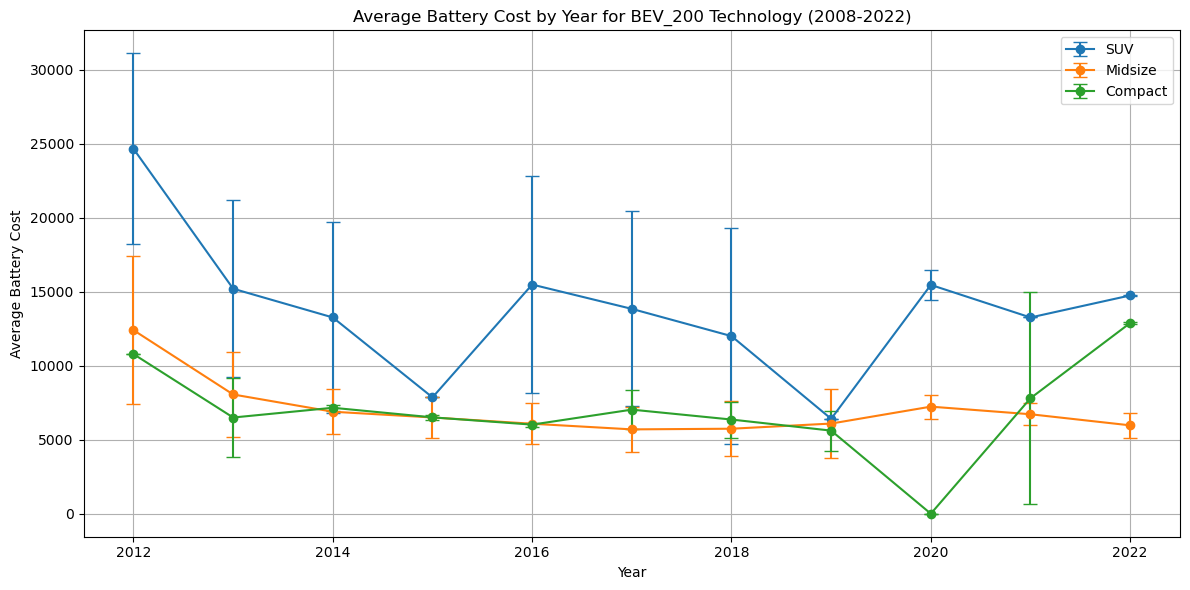

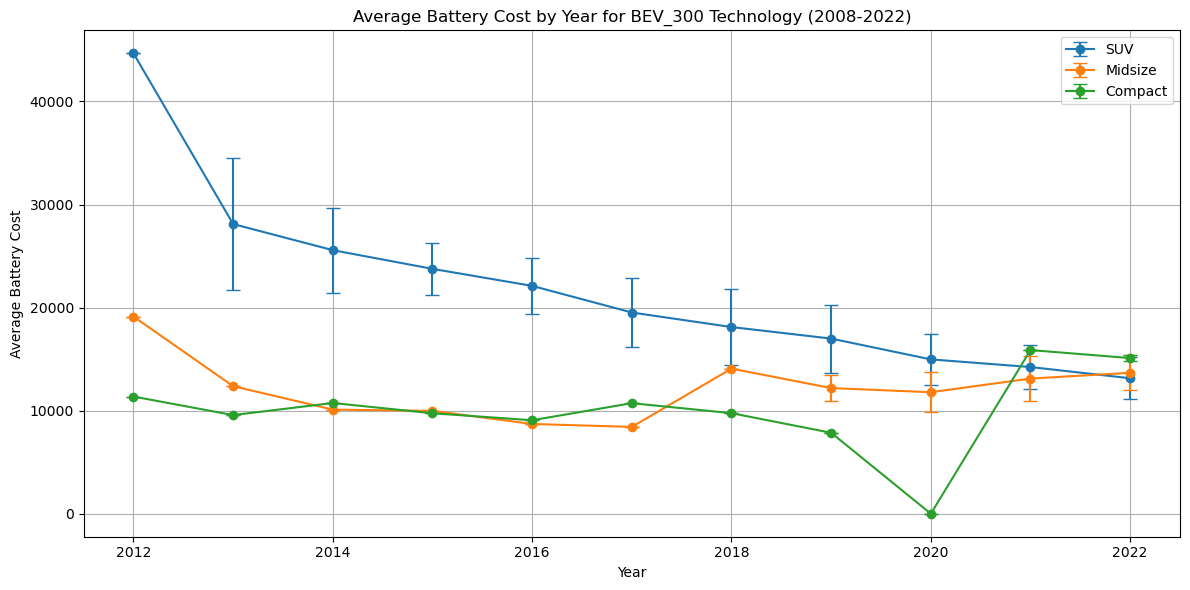

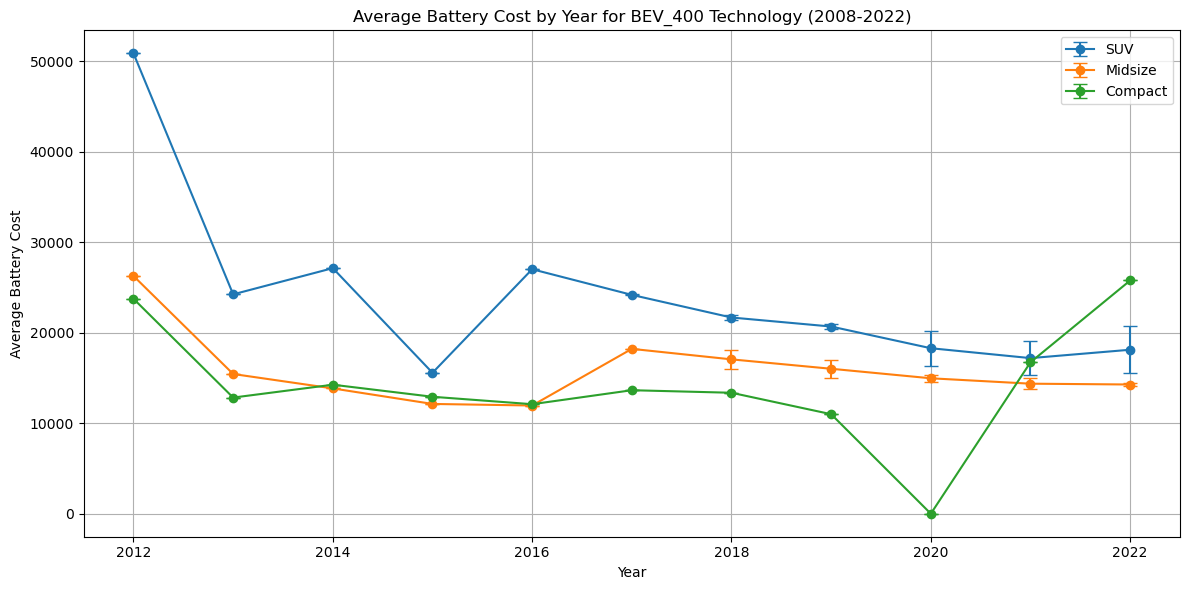

In [34]:
# Plotting for Each Tech Category
tech_categories = grouped_df_imputed['Tech'].unique()
for tech in tech_categories:
    plt.figure(figsize=(12, 6))
    for vehicle_class in grouped_df_imputed['class'].unique():
        class_tech_df = grouped_df_imputed[(grouped_df_imputed['Tech'] == tech) & (grouped_df_imputed['class'] == vehicle_class)]
        plt.errorbar(class_tech_df['year'], class_tech_df['battery_cost'], yerr=class_tech_df['std'], fmt='o-', label=f'{vehicle_class}', capsize=5)
    plt.title(f'Average Battery Cost by Year for {tech} Technology (2008-2022)')
    plt.xlabel('Year')
    plt.ylabel('Average Battery Cost')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
